# **Predicting Closing Day Price Using LSTM RNN model**

In [1]:
import numpy as np
import pandas as pd

## Loading Data

In [2]:
# Load the data and extract the closing prices
dataset = pd.read_csv('TataSteel.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/6/2022,107.400002,108.800003,106.050003,108.599998,105.167511,59505849
1,9/7/2022,107.550003,108.900002,107.099998,107.599998,104.199120,43945660
2,9/8/2022,108.400002,108.400002,105.349998,105.849998,102.504433,71228405
3,9/9/2022,107.000000,107.349998,105.500000,105.699997,102.359169,63647166
4,9/12/2022,106.800003,107.949997,106.500000,107.750000,104.344383,40838533


 ## **Working only on Closing Price**

In [3]:
closing_prices = dataset['Close'].values.reshape(-1, 1)
print('Lenght of Closing Price column is', len(closing_prices))

Lenght of Closing Price column is 261


## **Ploting Actual (current Dataset)**

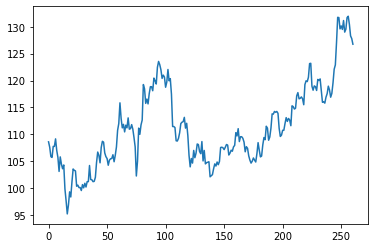

In [4]:
import matplotlib.pyplot as plt

plt.plot(dataset['Close'])  #ploting Dataset

## **Model Preprocessing**

In [5]:
from sklearn.preprocessing import MinMaxScaler

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))   #transforming closing_price values between 0 and 1
closing_prices_normalized = scaler.fit_transform(closing_prices)


## **Creating a func to run RNN**

In [7]:

#function is to create sequences from a given set of data

def create_sequences(data, time_steps):  
    #here data (input data) is any variable, where later we are going to put dataset['Close']
    #n_steps=time_steps=4 then -->1,2,3,4 values will predict 5th value,
    #2,3,4,5 values will predict 6th value
    #data-n_steps=no.of sequences
    X, y = [], []  #empty lists  #X for feature , y for target
    for i in range(len(data)):  #We go through each data point in the input dataset,
        #create seq of features & targets for each data pt
        #length of our data (length of closing price) may be 258
        end_ix = i + time_steps  # 1+5
        if end_ix > len(data)-1:   
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]  #featues and targets  #slicing dataset
        X.append(seq_x)  #1 to 5 is appended in X as 1st list,then is next iteration, 2 to 6 is appended in X as new list &so on 
        y.append(seq_y)  #6 is appended in y, then in next iteration, 7 is appended in y
    return np.array(X), np.array(y)  #convert lists into numpy arrays


In [8]:
# Define the number of time steps for the LSTM model
n_steps = 5  # Adjust as needed

# Create sequences
X, y = create_sequences(closing_prices_normalized, n_steps)
#X (input sequences) and y (corresponding targets) 

#`X`: A set of input sequences, each containing `n_steps` data points.
#`y`: The corresponding output or target for each input sequence, which is the data point immediately following the sequence.

#if n_step=5
#Each sequence of 5 data points becomes an X sequence.
#The next (6th) data point after each X sequence becomes the corresponding y value (the target you want to predict).

In [9]:
# print(X)
# print(y)

In [10]:
X.size     

1280

In [21]:
256*5

1280

In [12]:
len(X)   #this 251 will be number of seq  i.e.  #dataset(256)-time_step(5)= total number of values in X

256

In [22]:
256-5   #total number of sequences

251

if there are 10 list in X (each list having 5 values) the len(X)=10 , **len counts only list**

## **Split the data into training and testing sets**

In [14]:
#we have 2 columns X and y

train_size = int(0.8 * len(X))   
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

## **Building LSTM model**

In [15]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


**RNN/LSTM Layers for Sequence Processing:**

RNN and LSTM layers are especially effective for processing sequential data, capturing temporal dependencies and patterns in the data.
Dense Layer for Final Prediction:

After the RNN or LSTM layers have processed the sequence and captured relevant features, a Dense layer can be added to perform the final prediction or classification and both layers are useful also for predicting accuracy.



1. **LSTM (or RNN) Layers for Feature Extraction and Learning Temporal Patterns**:
   - LSTM (or RNN) layers are particularly effective in processing sequences of data, capturing temporal dependencies, and learning patterns over time.
   - These layers are used to extract features and understand the relationships and patterns within the sequential input data.
   - LSTM layers are crucial for minimizing loss and allowing the model to learn meaningful representations from the input sequences.

2. **Dense Layers for Final Prediction**:
   - Dense layers, often placed after LSTM layers (but not always), are used for making the final prediction based on the features learned by the preceding layers.
   - Dense layers allow the model to learn non-linear combinations of features and map these to the desired output.
   - The final Dense layer (or layers) transforms the learned features into the appropriate prediction format, whether it's a single numerical value, a class label, or another desired output format.

In summary, the LSTM (or RNN) layers are crucial for learning patterns and minimizing loss by processing the input sequences effectively. The Dense layers, typically positioned after the LSTM layers, help in refining these learned features and making the final predictions or classifications.

The combined architecture, including LSTM layers followed by Dense layers, is designed to optimize the learning process, capture temporal dependencies, and produce accurate predictions for the given task, such as predicting stock prices or any other time-series data.

In [16]:
#LSTM ,Dense ,...these all are layers in Network
model = Sequential()
#This line initializes a sequential model. A sequential model is like a linear stack of layers,
#where you can add layers one after the other.

model.add(LSTM(units=100, activation='relu', input_shape=(n_steps, 1)))
#The input_shape is typically specified only in the first layer to inform the model,
#about the shape of the input data it will receive
#LSTM layer is added to the model.
#units = no. of nodes in particular layer
#more units allow LSTM to learn more complex patterns
#but it also increases computational complexity
#relu = introduces non-linearity in the model.
#n_steps is the number of time steps in each sequence, and 1 indicates that each time step has one feature.


model.add(Dense(units=5))  # Output for the next 5 days
#This adds a dense layer to the model, which is the output layer.
#The dense layer is fully connected,
#meaning each unit in this layer is connected to every unit in the previous layer (LSTM layer in this case).
#The Dense layer will use a linear activation function by default,
# meaning it will output the weighted sum of its inputs without any non-linearity.

model.compile(optimizer='adam', loss='mse')
#This compiles the model and specifies the optimizer and loss function for training.
#adam=used to adjust the model's parameters during training to minimize the loss.
#loss is calulated through Mean Squared Error

In Keras, the activation function is a hyperparameter that you can set for each layer independently. If you don't specify an activation function for a particular layer, it will default to a linear activation (i.e., no activation function).

## **Training model**

**Verbose**

**verbose=0**: No output during training (silent mode).

**verbose=1**: Display a progress bar that updates after each epoch.

**verbose=2**: Display one line per epoch, showing the epoch number and the loss.
    
Determines how the training progress is displayed during the training process.

It is for **visualization purpose** and do not effect training of dataset

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=25, validation_data=(X_test, y_test))


Epoch 1/10
9/9 [==============================] - 6s 130ms/step - loss: 0.1308 - val_loss: 0.3896
Epoch 2/10
9/9 [==============================] - 0s 31ms/step - loss: 0.0901 - val_loss: 0.2567
Epoch 3/10
9/9 [==============================] - 0s 29ms/step - loss: 0.0449 - val_loss: 0.0933
Epoch 4/10
9/9 [==============================] - 0s 29ms/step - loss: 0.0114 - val_loss: 0.0087
Epoch 5/10
9/9 [==============================] - 0s 29ms/step - loss: 0.0121 - val_loss: 0.0184
Epoch 6/10
9/9 [==============================] - 0s 29ms/step - loss: 0.0076 - val_loss: 0.0316
Epoch 7/10
9/9 [==============================] - 0s 28ms/step - loss: 0.0074 - val_loss: 0.0151
Epoch 8/10
9/9 [==============================] - 0s 24ms/step - loss: 0.0067 - val_loss: 0.0160
Epoch 9/10
9/9 [==============================] - 0s 25ms/step - loss: 0.0063 - val_loss: 0.0115
Epoch 10/10
9/9 [==============================] - 0s 25ms/step - loss: 0.0059 - val_loss: 0.0113


The **epochs** parameter specifies the number of times the model will iterate over the entire training dataset during the training process.

The **batch_size** parameter determines the number of samples (data points) that will be used in each iteration (or batch) to update the model's weights.

The **validation_data** parameter helps to monitor the model's performance on unseen data and detect overfitting.(optional)

The **model.fit()** function will train the neural network using the specified training data (X_train, y_train). During each epoch, the training data is divided into batches (each of size batch_size), and the model's weights are updated based on the loss calculated on each batch. After each epoch, the model's performance is evaluated using the provided validation data.

## **Predicting Future Prices**

In [18]:
# Predict the closing prices for the next 5 days
latest_data = closing_prices_normalized[-n_steps:].reshape(1, n_steps, 1)
#This line extracts the most recent n_steps normalized closing prices (from closing_prices_normalized), 
#reshapes them into the format expected by the model for prediction (1 sample, n_steps time steps, 1 feature per time step).

predictions = model.predict(latest_data)


1/1 [==============================] - 1s 502ms/step


The **[-n_steps:]** indexing retrieves the last n_steps elements from the array.

**reshape(1, n_steps, 1)** is used to reshape this subset of data into the required shape for the LSTM model's input

**1:** Indicates a single sample or instance of the data.

**n_steps**: Represents the number of time steps in the sequence (in this case, the last n_steps normalized closing prices).

**1**: Denotes the number of features at each time step. In this case, we have a single feature (normalized closing price) at each time step.

This input shape conforms to the LSTM's expected input structure, where each time step is represented as a separate dimension, and there's a single feature per time step.


## **Inverse Transform and Predicting Prices**

In [19]:
# Inverse transform the predictions to get actual closing prices
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1))

print('Predicted closing prices for the next 5 days:')
print(predicted_prices)

Predicted closing prices for the next 5 days:
[[127.765175]
 [126.23036 ]
 [127.52702 ]
 [127.82935 ]
 [128.7562  ]]


## **Ploting Predicted(Future) Prices**

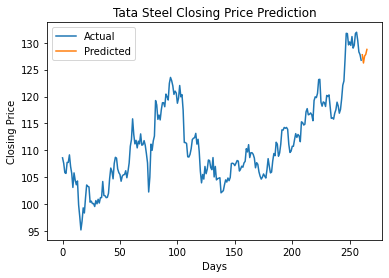

In [20]:
plt.plot(np.arange(len(closing_prices)), closing_prices, label='Actual')
plt.plot(np.arange(len(closing_prices), len(closing_prices) + len(predicted_prices)), predicted_prices, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.title('Tata Steel Closing Price Prediction')
plt.legend()
plt.show()

#("Plunge"or"Surge") 